In [2]:
library(tidyverse)
library(modelr)
source("rod.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# STATS 306
## Problem Set 8
Each problem is worth one point, for a total of 10.

## Part I: Simulation
In Exercises 1-5, you will write code to simulate certain experiments. The solutions to these exercises are examples of the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

### Playing card experiment

Suppose you are given two standard decks of playing cards (52 cards each, total of 104 cards) and you do the following experiment: 
1.  Shuffle both decks thoroughly, so that they are randomly ordered.
2.  Draw the top card off of each deck.
3.  If the two cards exactly match (same suit and rank), award yourself one point; otherwise award yourself no points.
4.  Repeat steps two and three for the remaining 51 pairs of cards.
Let $X$ be your total score at the end of the experiment.

By writing code to simulate this experiment, answer problems 1-3:

#### Problem 1
To the nearest hundredth, what the expected value of $X$, i.e. what is $\mathbb{E}X$?

In [99]:
### BEGIN SOLUTION
# deck <- as.vector(outer(c(2:10, "J", "Q", "K", "A"), c("♠", "♥", "♦", "♣"), str_c, sep=""))
set.seed(1)
play_game <- function(.) sum(sample(52) == 1:52)  # count fixed points of a random permutation.
n <- 1000000
X <- map_int(1:n, play_game) 
mu <- mean(X)
sigma <- sd(X) / sqrt(n)
c(mu - 4 * sigma, mu + 4 * sigma)
# with 1 million trials, the mean is 1.0016 with a standard error of .001. 
# Hence, with overwhelmingly high probability, the sample mean is in the range 
# [1.0016 - 3 * .001, 1.0016 + 3 * .001] = [0.9967649, 1.0047611], so we can conclude 
# that E(X) = 1.00.
### END SOLUTION

[1] 0.9967649 1.0047611

#### Problem 2
To the nearest hundredth, what is the probability that $X$ is equal to zero? I.e., what is $\mathbb{P}(X=0)$? (*Hint*: the probability that $X=0$ equals the expected value of a random variable which equals one when $X=0$ and zero otherwise.)

In [60]:
### BEGIN SOLUTION
# deck <- as.vector(outer(c(2:10, "J", "Q", "K", "A"), c("♠", "♥", "♦", "♣"), str_c, sep=""))
X0 = X == 0
mu_0 <- mean(X0)
sigma_0 <- sd(X0) / sqrt(n)
c(mu_0 - 4 * sigma_0, mu_0 + 4 * sigma_0)
# 0.37
### END SOLUTION

[1] 0.3662358 0.3700942

#### Problem 3
Can you give an exact answer for problem 2? (Hint: consider $1/\mathbb{P}(X=0)$).

In [93]:
### BEGIN SOLUTION
# 1 / mu_0 = 2.722207. This looks pretty close to $e = 2.718282$. 
# If we simulate more, we find that indeed, P(X=0) is very close to 1/e. 
# (Mathematically, it would converge to 1/e if we let the deck size tend to infinity.)
# 
1 / mean(map_int(1:1000000, play_game) == 0)
### END SOLUTION

[1] 2.721874

#### Problem 4
Suppose I repeat the following experiment a large number of times: sample a point $(x,y)$ uniformly at random from $[-1,1]\times[-1,1]$. Let $Z=1$ if the distance from $(x,y)$ to the origin is less than one. What is $\mathbb{E}Z$, the expected value of $Z$? Can you give an exact expression?

In [87]:
### BEGIN SOLUTION
x = runif(n = 1000000)
y = runif(n = 1000000)
Z = sqrt(x^2 + y^2) <= 1
mean(Z)
# this is simply the ratio of the area of a unit circle to the area of the box.
# in other words, pi / 4
pi / 4
### END SOLUTION

[1] 0.786015

[1] 0.7853982

#### Problem 5
Suppose I repeat the following experiment a large number of times: I draw two parallel lines 1 inch apart on the floor. Then, I drop a 1-inch long rod on the floor so that its center falls somewhere between the two lines.

What is the probability that the rod intersects one of the two lines?

The function `run_rod_experiment()` can be run repeatedly to illustrate how the game is played:

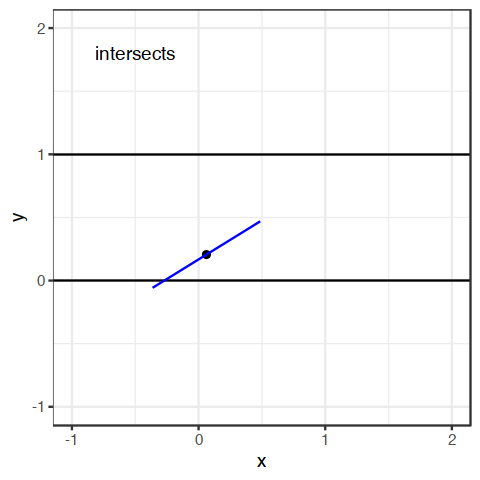

In [5]:
run_rod_experiment()

In [120]:
### BEGIN SOLUTION

### END SOLUTION

## Part II: Regression

#### Problem 6
Consider the following regression:

In [123]:
lm(log(price) ~ log(carat), diamonds) %>% summary


Call:
lm(formula = log(price) ~ log(carat), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50833 -0.16951 -0.00591  0.16637  1.33793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.448661   0.001365  6190.9   <2e-16 ***
log(carat)  1.675817   0.001934   866.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2627 on 53938 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.933 
F-statistic: 7.51e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


The high $R^2$ and small $p$-values indicate that $\log(\text{price})$ and $\log(\text{carat})$ are approximately linearly related. (We also plotted this relationship in lecture.)

What does this regression say about the relationship between __`price`__ (not `log(price)`) and __`carat`__ (not `log(carat)`)?

### BEGIN SOLUTION
$\text{price} = e^{a_0}\exp({a_1\text{carat}}).$ An increase of one carat increases price by a multiplicative factor of $e^{1.68} = 5.4$.
### END SOLUTION

#### Problem 7
Consider the following regression:

In [126]:
lm(price ~ poly(carat, 2), diamonds) %>% summary


Call:
lm(formula = price ~ poly(carat, 2), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-26350.0   -724.2    -35.9    445.8  12881.1 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.933e+03  6.631e+00   593.1   <2e-16 ***
poly(carat, 2)1 8.539e+05  1.540e+03   554.4   <2e-16 ***
poly(carat, 2)2 3.757e+04  1.540e+03    24.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1540 on 53937 degrees of freedom
Multiple R-squared:  0.851,	Adjusted R-squared:  0.851 
F-statistic: 1.54e+05 on 2 and 53937 DF,  p-value: < 2.2e-16


According to this regression, what is the relationship between `price` and `carat`? What effect does increasing `carat` have on price? Compared to the model in problem 6, do you think that this is this a better or worse model for predicting the price of a diamond based on its weight?

#### Problem 8

Pearson's correlation coefficient, denoted $\rho$, measures the strength of a linear relationship between two variables $x$ and $y$. It's implemented using the `cor()` function in R:

In [8]:
set.seed(1)
x = rnorm(100, sd=.1)
y = 3 + 2 * x + rnorm(100, sd = 1)
cor(x, y)

[1] 0.1833815

To test whether a linear relationship exists between two variables, we can use the function `cor.test()` to test the null hypothesis $H_0: \rho=0$:

In [9]:
cor.test(x, y)


	Pearson's product-moment correlation

data:  x and y
t = 1.8467, df = 98, p-value = 0.06781
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01352373  0.36659507
sample estimates:
      cor 
0.1833815 


Consider how you might test whether the correlation between $x$ and $y$ is zero using the linear model. By running an appropriate regression, show that you get *the exact same* $p$-value as that obtained by `cor.test()`. How can we infer the correlation coefficient $\rho=0.183$ from the regression result?

In [10]:
### BEGIN SOLUTION
s <- lm(y ~ x) %>% summary %>% print
coef(s)
s$r.squared %>% sqrt
### END SOLUTION


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8768 -0.6138 -0.1395  0.5394  2.3462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.96231    0.09699  30.543   <2e-16 ***
x            1.98940    1.07727   1.847   0.0678 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9628 on 98 degrees of freedom
Multiple R-squared:  0.03363,	Adjusted R-squared:  0.02377 
F-statistic:  3.41 on 1 and 98 DF,  p-value: 0.06781



,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.962307,0.09698729,30.543252,7.065184e-52
x,1.989396,1.07727031,1.846701,6.780814e-02


[1] 0.1833815

#### Problem 9

A noted criticism of Pearson's correlation is that it only measures the strength of a *linear* correlation between two random variables. Consider the variables $x$ and $y$ defined in the file `spearman.csv`:

In [6]:
sp <- read_csv("spearman.csv") %>% print

Parsed with column specification:
cols(
  x = col_double(),
  y = col_double()
)


# A tibble: 101 x 2
        x       y
    <dbl>   <dbl>
 1 0.689   0.594 
 2 0.468   0.119 
 3 0.808   0.580 
 4 0.0934  0.100 
 5 0.238   0.0981
 6 0.0467 -0.0138
 7 0.655   0.412 
 8 0.171   0.118 
 9 0.591   0.251 
10 0.508   0.512 
# … with 91 more rows


Are $x$ and $y$ correlated according to Pearson's test? Are they related at all? Support your answer with an appropriate visual or statistical argument.

### BEGIN SOLUTION
The Pearson test is insignificant, but if you plot the data you'll see that the result is driven by a single outlier. If you drop the outlier, you get a significant result. Note also that the remaining data seem to lie on a curve. They are related, but not necessarily linearly related.
### END SOLUTION


	Pearson's product-moment correlation

data:  sp$x and sp$y
t = 0.16219, df = 99, p-value = 0.8715
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1797128  0.2110658
sample estimates:
       cor 
0.01629891 



	Pearson's product-moment correlation

data:  sp$x[!outlier] and sp$y[!outlier]
t = 21.195, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8632539 0.9359054
sample estimates:
      cor 
0.9060443 


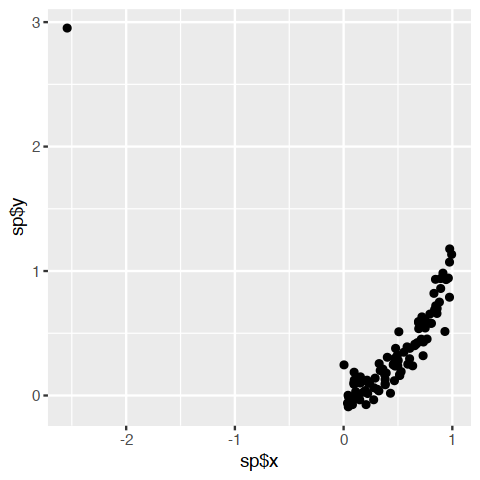

In [7]:
### BEGIN SOLUTION
cor.test(sp$x, sp$y)
qplot(sp$x, sp$y)
outlier = sp$y > 2
cor.test(sp$x[!outlier], sp$y[!outlier])
### END SOLUTION

#### Problem 9
Recall that the `rank()` function maps a vector to a vector of integers denoting the numerical rank of each entry of the vector:

In [19]:
rank(c(2,6,9,10,8))

[1] 1 2 4 5 3

To address potential shortcomings in Pearson's test, *Spearman's rank correlation test* looks for correlations between the *ranks* of two vectors $x$ and $y$. This will do a better job of picking out a non-linear relationship between $x$ and $y$, so long as that relationship is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function). Verify this visualizing the relationship of `rank(x)` and `rank(y)`.

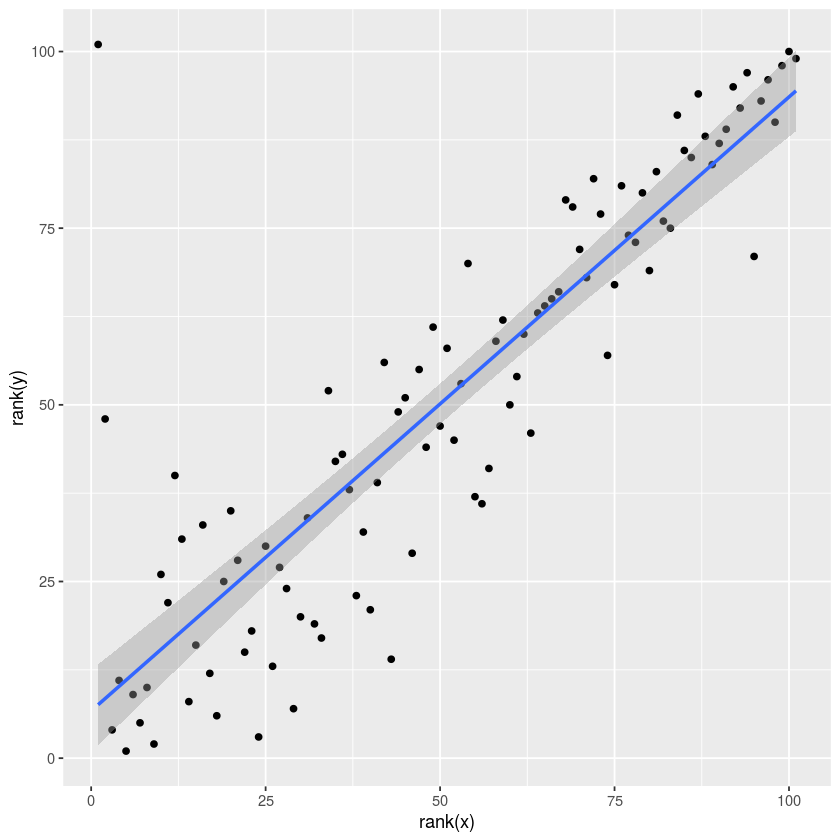

In [20]:
### BEGIN SOLUTION
ggplot(sp, aes(rank(x), rank(y))) + geom_point() + geom_smooth(method="lm")
### END SOLUTION

Spearman's test is implemented using the `cor.test(..., method="spearman")` command.

Show that regressing the rank of `y` on the rank of `x` gives you you the *exact same* $p$-values and estimates for $\rho$ as Spearman't test.

In [21]:
### BEGIN SOLUTION
cor.test(sp$y, sp$x, method="spearman")
lm(rank(y) ~ rank(x), data=sp) %>% summary
### END SOLUTION


	Spearman's rank correlation rho

data:  sp$y and sp$x
S = 22534, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8687595 



Call:
lm(formula = rank(y) ~ rank(x), data = sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.050  -7.775   0.706   5.462  93.438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.69327    2.92392   2.289   0.0242 *  
rank(x)      0.86876    0.04977  17.454   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.58 on 99 degrees of freedom
Multiple R-squared:  0.7547,	Adjusted R-squared:  0.7523 
F-statistic: 304.7 on 1 and 99 DF,  p-value: < 2.2e-16


Spearman's test is an example of a [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) test: it does not make any assumptions about the distribution of the data. We will see other examples of non-parametric tests below.

#### Problem 10
##### The $t$-test
The one-sample $t$-test is used to test the null hypothesis that the mean of a random variable is zero. It's implemented in R using the `t.test()` command:

In [27]:
x <- rnorm(100, mean=.1)
t.test(x)


	One Sample t-test

data:  x
t = 2.3256, df = 99, p-value = 0.02208
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.03066513 0.38710961
sample estimates:
mean of x 
0.2088874 


By running an appropriate regression, show that the linear model produces *the exact same* $t$ statistic, confidence intervals, and $p$-values as the $t$-test.

In [32]:
### BEGIN SOLUTION
lm(x ~ 1) %>% {
    print(summary(.))
    print(confint(.))
}
### END SOLUTION


Call:
lm(formula = x ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32359 -0.60313  0.00502  0.58266  2.29273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.20889    0.08982   2.326   0.0221 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8982 on 99 degrees of freedom

                 2.5 %    97.5 %
(Intercept) 0.03066513 0.3871096
